In [29]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn import datasets
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from numpy import mean
from numpy import std



In [4]:
iris=datasets.load_iris()
iris

print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
#Find out about Iris

print(iris.keys())
#print(iris['frame'])
#iris['data']
iris['feature_names']

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
iris['target']
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
iris_df=pd.DataFrame(iris['data'],columns=iris['feature_names'])
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [29]:
#iris_df['target']=iris['target'] # Add labels
#iris_df.drop(axis=1,columns=['target'])


In [8]:
# Find out min,max,mean,std of each column

print(iris_df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


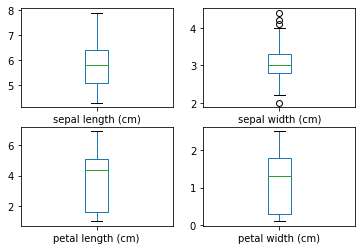

In [9]:
# BOX PLOT
iris_df.plot(kind='box',subplots=True,layout=(2,2))
# subplots=True: seperated 
plt.show()

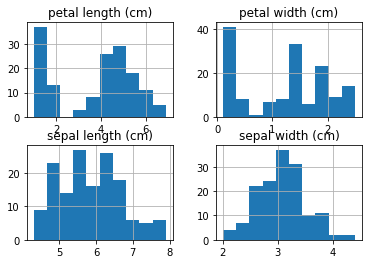

In [10]:
# HISTOGRAM
iris_df.hist()
plt.show()

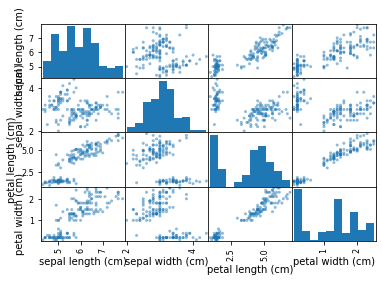

In [33]:
scatter_matrix(iris_df)
plt.show()


SPLIT DATA TO TRAINING AND TEST SET 75-25

In [20]:
#iris.target
y=iris.target
x=iris_df.values
test_size=0.25
seed=5
x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(x,y,test_size=test_size,random_state=seed)



K NEAREST NEIGHBOR

In [21]:
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.metrics import accuracy_score
#from sklearn.metrics import classification_report
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn_prediction=knn.predict(x_test)
print(accuracy_score(y_test,knn_prediction))
print(accuracy_score(y_test,knn_prediction,normalize=False)) # HOW MANY SAMPLE CORRECTLY PREDICTED
print(classification_report(y_test,knn_prediction))




0.9473684210526315
36
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.86      0.92        14
           2       0.86      1.00      0.92        12

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



LOGISTIC REGRESSION MODEL WITH CROSS VALIDATION

In [49]:
lr=LogisticRegression()
kfold=model_selection.KFold(n_splits=10,random_state=5,shuffle=True)# cv

#Evaluate model
score=cross_val_score(lr,x_train,y_train,scoring='accuracy',cv=kfold)

#Performance
print('Accuracy: %f (%f)' % (score.mean(),score.std()))


Accuracy: 0.965152 (0.056712)


E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result